## Preparing the tools



In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset and exploring it

In [63]:
data = pd.read_csv('data.csv',sep=';' )
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [64]:
## DataPreparation
label = data.columns[-1]
features = list(data.columns[:-1])
num_features = len(features)

print("Number of features: ", num_features)
print("Features: ", features)
print("Label: ", label, ", Can be: ", data[label].unique())






Number of features:  36
Features:  ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation 

## Data Balancing

We will use SMOTE to balance the dataset. SMOTE stands for Synthetic Minority Over-sampling Technique, which is a method to create synthetic samples for the minority class in an imbalanced dataset.

In [65]:
# Balancing the dataset
Dropout = data[data[label] == 'Dropout']
Graduate = data[data[label] == 'Graduate']
Enrolled = data[data[label] == 'Enrolled']

print("Graduate: ", Graduate.shape[0])
print("Dropout: ", Dropout.shape[0])
print("Enrolled: ", Enrolled.shape[0])


Graduate:  2209
Dropout:  1421
Enrolled:  794


In [66]:
from imblearn.over_sampling import SMOTE
Enrolled = data[data[label] == 'Enrolled']

# Graduate = Graduate.sample(Enrolled.shape[0])
# Dropout = Dropout.sample(Enrolled.shape[0])
# balanced_data = pd.concat([Enrolled, Graduate, Dropout], axis=0)
# X_resampled = balanced_data[features]
# y_resampled = balanced_data[label]

X = data[features]
y = data[label]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset shape",y.value_counts())
print("Resampled dataset shape", y_resampled.value_counts())

data_resampled = pd.DataFrame(X_resampled,columns=features)
data_resampled[label]= y_resampled

print(data_resampled.head())
print(data_resampled[label].value_counts())

Original dataset shape Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
Resampled dataset shape Target
Dropout     2209
Graduate    2209
Enrolled    2209
Name: count, dtype: int64
   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)

## Feature Analysis

We will analyze the features of the dataset to understand their distributions and relationships with the target variable.

Starting feature importance analysis...
Data prepared. X_resampled_df shape: (6627, 36), y_resampled_encoded shape: (6627,)
Training RandomForestClassifier to extract feature importances...


/tmp/ipykernel_31929/3588972512.py:43: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_resampled_encoded = label_encoder.fit_transform(y_resampled.ravel()) # .ravel() ensures y is 1D


RandomForestClassifier trained.
\nFeature Importances (Top 20):
                                   Feature  Importance
0      Curricular units 2nd sem (approved)    0.130790
1         Curricular units 2nd sem (grade)    0.103093
2      Curricular units 1st sem (approved)    0.080120
3         Curricular units 1st sem (grade)    0.059317
4                  Tuition fees up to date    0.050394
5   Curricular units 2nd sem (evaluations)    0.041858
6                          Admission grade    0.038857
7           Previous qualification (grade)    0.036843
8                        Age at enrollment    0.035720
9                                   Course    0.033943
10  Curricular units 1st sem (evaluations)    0.032746
11                                     GDP    0.029799
12                       Unemployment rate    0.028848
13                     Father's occupation    0.028633
14                          Inflation rate    0.027757
15                     Mother's occupation    0.027512
1

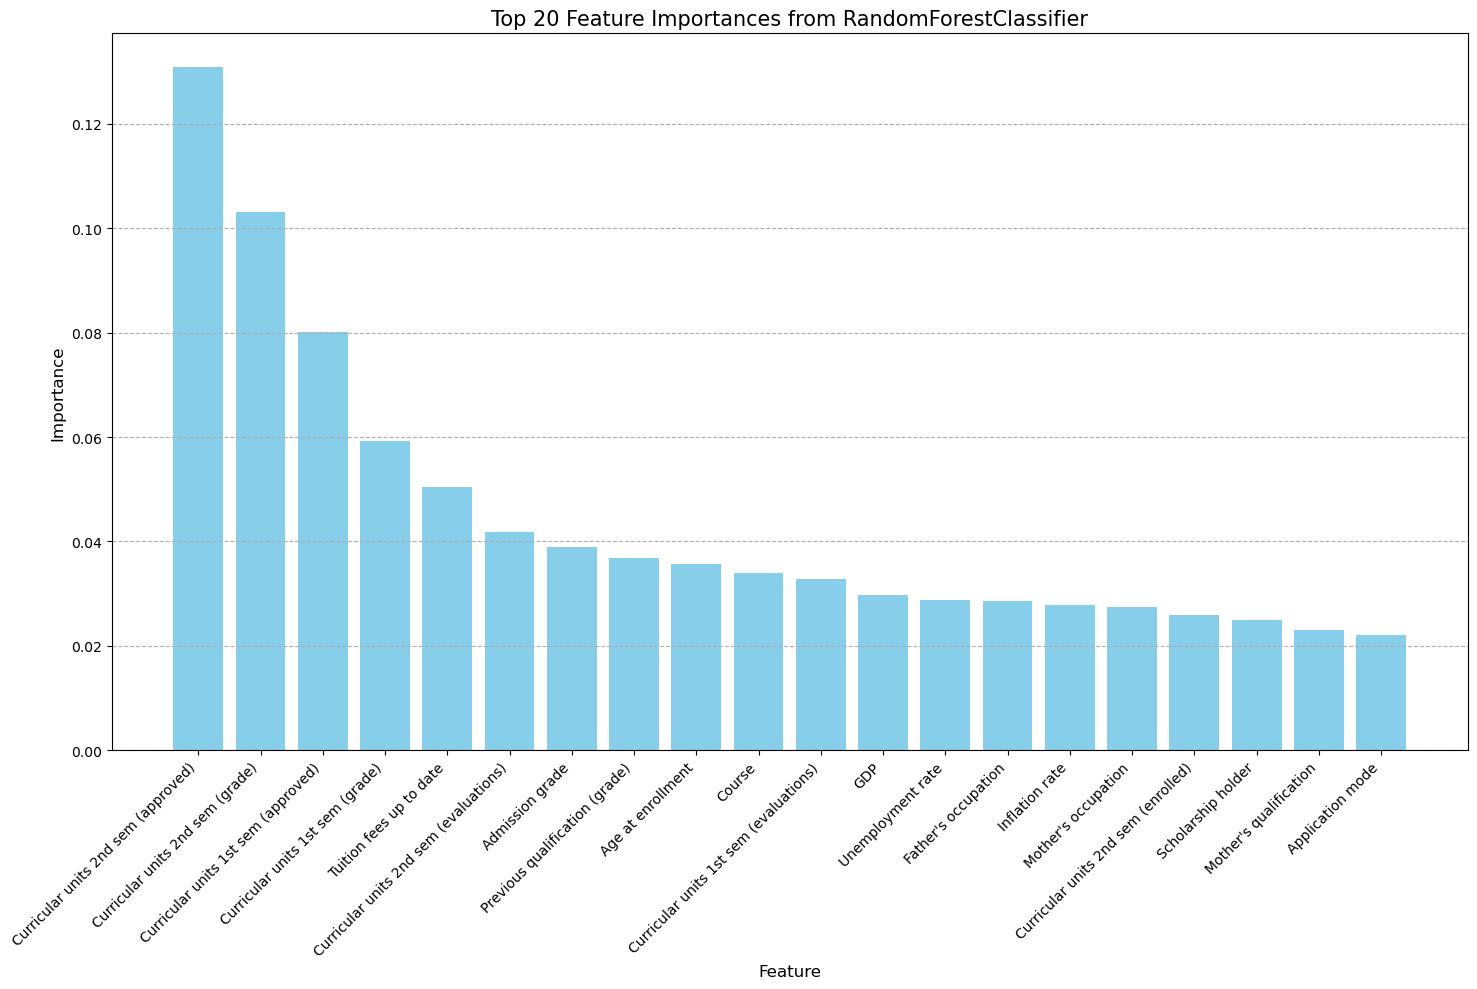

\n--- How to Use These Feature Importances ---
The plot and table above show the features ranked by their importance according to the Random Forest model.
Features with higher importance scores contribute more to the model's predictions.
\nExample: Top 10 features are: ['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Tuition fees up to date', 'Curricular units 2nd sem (evaluations)', 'Admission grade', 'Previous qualification (grade)', 'Age at enrollment', 'Course']
You can use this list (`top_10_features`) to create a new, smaller feature set for training your models:
e.g., `X_selected_features = X_resampled_df[top_10_features]`
\nConsider the following for feature selection:
1. Select the top N features (e.g., top 10, 15, or 20).
2. Select features whose importance is above a certain threshold (e.g., > 0.01).
3. Experiment by training your models (Logistic Regression, MLP, tuned Ran

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# --- Prerequisites ---
# Make sure the following variables are available from your previous notebook cells:
# X_resampled: Your feature matrix after SMOTE (as a NumPy array or pandas DataFrame)
# y_resampled: Your target variable after SMOTE (as a NumPy array or pandas Series)
# features: A list of strings containing the names of the features in X_resampled.

print("Starting feature importance analysis...")

# --- 1. Prepare Data ---
# Ensure X_resampled is a pandas DataFrame with correct feature names
if not isinstance(X_resampled, pd.DataFrame):
    # If 'features' list is not available, you might need to define it based on your original data
    # For example: features = list(data.columns[:-1]) if 'data' is your original DataFrame
    if 'features' not in globals():
        print("Error: 'features' list not found. Please ensure it's loaded from a previous cell.")
        # As a fallback, if X_resampled has a default range of column names, use that,
        # but it's better to have actual feature names.
        if hasattr(X_resampled, 'shape'):
             print(f"Using generic feature names as a fallback for {X_resampled.shape[1]} features.")
             features = [f'feature_{i}' for i in range(X_resampled.shape[1])]
        else:
            raise ValueError("'features' list not defined and X_resampled shape not available.")
            
    X_resampled_df = pd.DataFrame(X_resampled, columns=features)
else:
    X_resampled_df = X_resampled
    features = X_resampled_df.columns.tolist() # Get feature names if X_resampled is already a DataFrame

# Clean feature names if they contain problematic characters (like tabs) for plotting
# It's best to do this during initial data loading, but here's a quick check/fix for common issues.
cleaned_features = [name.replace('\t', ' ').strip() for name in features]
X_resampled_df.columns = cleaned_features

# Ensure y_resampled is 1D and numerically encoded for RandomForestClassifier
# RandomForestClassifier can often handle string labels, but explicit encoding is safer.
label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled.ravel()) # .ravel() ensures y is 1D

print(f"Data prepared. X_resampled_df shape: {X_resampled_df.shape}, y_resampled_encoded shape: {y_resampled_encoded.shape}")

# --- 2. Train RandomForestClassifier for Feature Importance ---
# You can use default parameters or parameters found from previous tuning.
# For feature importance, a reasonably complex model is generally good.
print("Training RandomForestClassifier to extract feature importances...")
# Using n_jobs=-1 to utilize all available CPU cores for faster training.
# random_state for reproducibility.
rf_feature_selector = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_feature_selector.fit(X_resampled_df, y_resampled_encoded)
print("RandomForestClassifier trained.")

# --- 3. Get and Display Feature Importances ---
importances = rf_feature_selector.feature_importances_
feature_names = X_resampled_df.columns

# Create a DataFrame for easier sorting and viewing
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("\\nFeature Importances (Top 20):")
print(importance_df.head(20))

# --- 4. Plot Feature Importances ---
plt.figure(figsize=(15, 10)) # Adjusted figure size for better readability
# Plotting top N features to avoid clutter if there are many features.
top_n_to_plot = 20 if len(features) > 20 else len(features)

plt.bar(importance_df['Feature'][:top_n_to_plot], importance_df['Importance'][:top_n_to_plot], color='skyblue')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title(f'Top {top_n_to_plot} Feature Importances from RandomForestClassifier', fontsize=15)
plt.xticks(rotation=45, ha="right", fontsize=10) # Rotate labels for better readability
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.tight_layout() # Adjust layout to make sure everything fits
plt.show()

# --- 5. Guidance on Using These Features ---
print("\\n--- How to Use These Feature Importances ---")
print("The plot and table above show the features ranked by their importance according to the Random Forest model.")
print("Features with higher importance scores contribute more to the model's predictions.")

# Example: Select top 10 features
top_10_features = importance_df['Feature'][:10].tolist()
print(f"\\nExample: Top 10 features are: {top_10_features}")
print("You can use this list (`top_10_features`) to create a new, smaller feature set for training your models:")
print("e.g., `X_selected_features = X_resampled_df[top_10_features]`")

print("\\nConsider the following for feature selection:")
print("1. Select the top N features (e.g., top 10, 15, or 20).")
print("2. Select features whose importance is above a certain threshold (e.g., > 0.01).")
print("3. Experiment by training your models (Logistic Regression, MLP, tuned Random Forest) with this reduced feature set and compare their performance against models trained on all features. This can sometimes improve performance by reducing noise and overfitting, and also reduce training time.")
print("4. For a more rigorous approach, you could use techniques like Recursive Feature Elimination with Cross-Validation (RFECV).")
print("5. Also, analyze correlations between your top features. Highly correlated features might be redundant, and you could consider keeping only one of them.")


## Correlation Matrix

Starting correlation analysis for top features...
Selected top 20 features for correlation analysis: ['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Tuition fees up to date', 'Curricular units 2nd sem (evaluations)', 'Admission grade', 'Previous qualification (grade)', 'Age at enrollment', 'Course', 'Curricular units 1st sem (evaluations)', 'GDP', 'Unemployment rate', "Father's occupation", 'Inflation rate', "Mother's occupation", 'Curricular units 2nd sem (enrolled)', 'Scholarship holder', "Mother's qualification", 'Application mode']
\nCorrelation Matrix (Top N Features):
                                     Curricular units 2nd sem (approved)  \
Curricular units 2nd sem (approved)                             1.000000   
Curricular units 2nd sem (grade)                                0.747154   
Curricular units 1st sem (approved)                             0.896805   
Curricular 

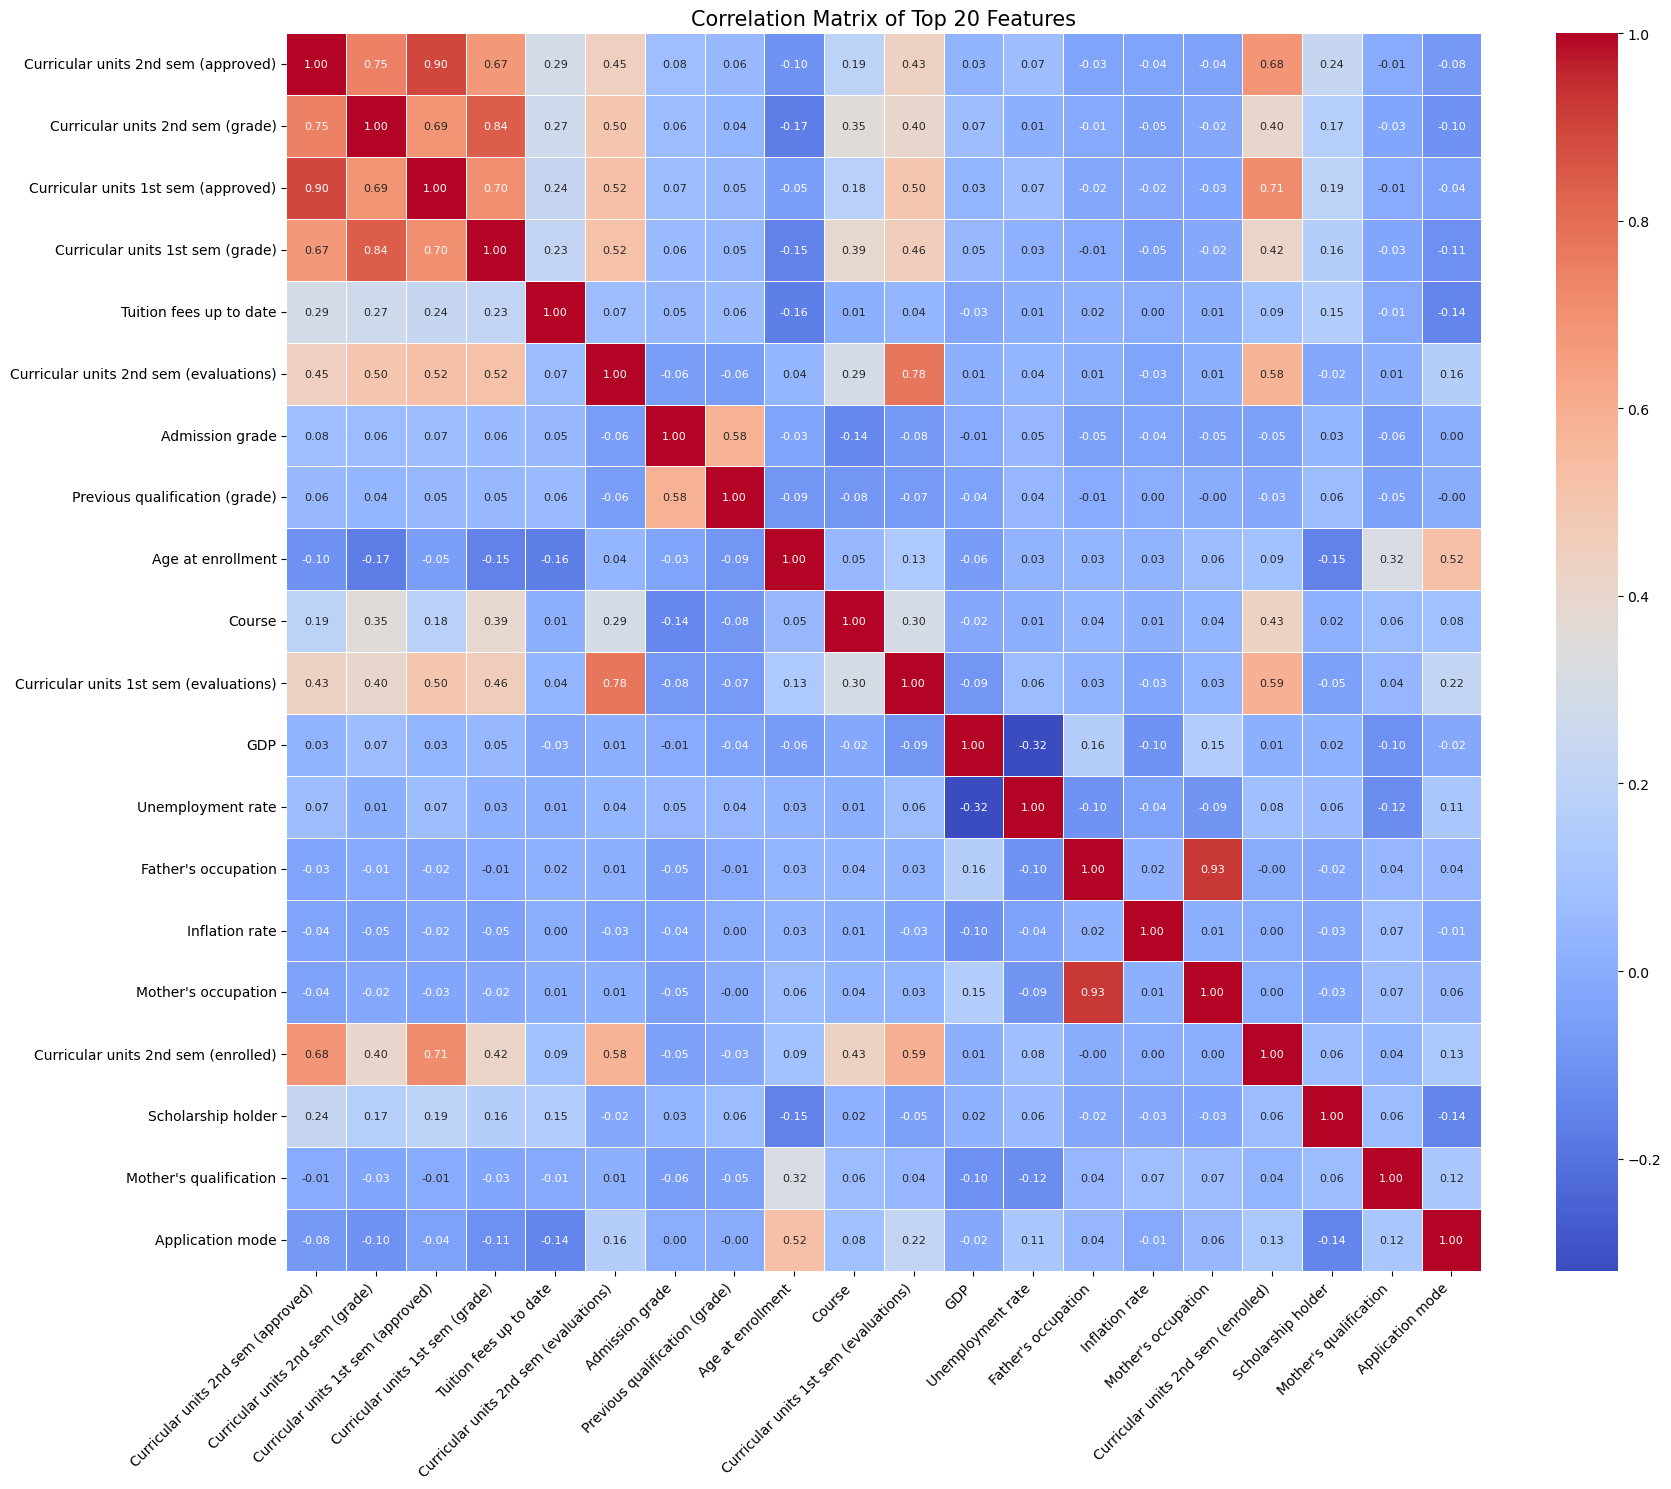

\n--- Interpreting and Dealing with Highly Correlated Features ---
The heatmap above visualizes the correlation between the top features.
Values close to +1 or -1 indicate strong positive or negative correlation, respectively.
Values close to 0 indicate weak or no linear correlation.
\nStrategies to consider for highly correlated features (e.g., |correlation| > 0.7 or 0.8):
1.  **Keep One Feature:**
    - From a pair or group of highly correlated features, consider keeping only one.
    - Which one to keep? 
        - The one with higher feature importance (from your previous analysis).
        - The one that makes more sense from a domain knowledge perspective.
        - The one that is easier to measure or obtain in a real-world scenario.
    - For example, 'Curricular units 2nd sem (approved)' and 'Curricular units 2nd sem (grade)' are likely highly correlated. You might choose to keep the one with higher importance.
\n2.  **Combine Features (Feature Engineering):**
    - Sometimes,

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns # For a prettier heatmap
import matplotlib.pyplot as plt

# --- Prerequisites ---
# Ensure X_resampled_df and importance_df are available from the previous cell.
# X_resampled_df: pandas DataFrame of your features after SMOTE.
# importance_df: pandas DataFrame with 'Feature' and 'Importance' columns.

print("Starting correlation analysis for top features...")

# --- 1. Select Top N Features ---
# You can adjust N as needed. Let's use the top 20 as in your plot.
N_TOP_FEATURES = 20
if len(importance_df) < N_TOP_FEATURES:
    N_TOP_FEATURES = len(importance_df)

top_n_feature_names = importance_df['Feature'][:N_TOP_FEATURES].tolist()
X_top_features_df = X_resampled_df[top_n_feature_names]

print(f"Selected top {N_TOP_FEATURES} features for correlation analysis: {top_n_feature_names}")

# --- 2. Calculate Correlation Matrix ---
correlation_matrix = X_top_features_df.corr()

print("\\nCorrelation Matrix (Top N Features):")
# Displaying a part of the matrix as it can be large
print(correlation_matrix.head())

# --- 3. Visualize Correlation Matrix as a Heatmap ---
plt.figure(figsize=(18, 15)) # Adjust size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title(f'Correlation Matrix of Top {N_TOP_FEATURES} Features', fontsize=15)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# --- 4. Guidance on Dealing with Multicollinearity ---
print("\\n--- Interpreting and Dealing with Highly Correlated Features ---")
print("The heatmap above visualizes the correlation between the top features.")
print("Values close to +1 or -1 indicate strong positive or negative correlation, respectively.")
print("Values close to 0 indicate weak or no linear correlation.")

print("\\nStrategies to consider for highly correlated features (e.g., |correlation| > 0.7 or 0.8):")
print("1.  **Keep One Feature:**")
print("    - From a pair or group of highly correlated features, consider keeping only one.")
print("    - Which one to keep? ")
print("        - The one with higher feature importance (from your previous analysis).")
print("        - The one that makes more sense from a domain knowledge perspective.")
print("        - The one that is easier to measure or obtain in a real-world scenario.")
print("    - For example, 'Curricular units 2nd sem (approved)' and 'Curricular units 2nd sem (grade)' are likely highly correlated. You might choose to keep the one with higher importance.")

print("\\n2.  **Combine Features (Feature Engineering):**")
print("    - Sometimes, you can create a new feature that combines the information from correlated features.")
print("    - Example: If you have 'number of courses taken' and 'total study hours', you could create 'average study hours per course'. This is more advanced and context-dependent.")

print("\\n3.  **Use Models Robust to Multicollinearity:**")
print("    - Tree-based models like Random Forest and Gradient Boosting are generally less affected by multicollinearity than linear models (Logistic Regression, Linear Regression) or SVMs with linear kernels.")
print("    - However, severe multicollinearity can still sometimes make feature importances in tree models a bit less stable or harder to interpret (e.g., importance might be split between correlated features).")

print("\\n4.  **Dimensionality Reduction:**")
print("    - Techniques like Principal Component Analysis (PCA) can transform your correlated features into a smaller set of uncorrelated components.")
print("    - The downside is that these new components are often harder to interpret than the original features.")

print("\\n5.  **Do Nothing (with caution):**")
print("    - If your primary goal is prediction accuracy and your chosen model is robust (like Random Forest), you might sometimes get away with leaving correlated features in, especially if the performance is good.")
print("    - However, for model interpretability or for models sensitive to it, addressing multicollinearity is important.")

print("\\n**Next Steps Example:**")
print("Identify pairs with high correlation from the heatmap (e.g., > 0.8).")
# Example of how to find highly correlated pairs (you'll need to inspect the heatmap or matrix directly)
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop_candidates = set()
highly_correlated_pairs = []

for column in upper.columns:
    for row_label in upper.index:
        if abs(upper.loc[row_label, column]) > 0.8: # Threshold for high correlation
            highly_correlated_pairs.append((row_label, column, upper.loc[row_label, column]))
            # Basic strategy: mark the one with lower overall importance to consider dropping
            # This is a simplistic approach; manual review is better.
            # Ensure importance_df is indexed by 'Feature' for easy lookup
            importance_df_indexed = importance_df.set_index('Feature')
            if column in importance_df_indexed.index and row_label in importance_df_indexed.index:
                if importance_df_indexed.loc[column, 'Importance'] < importance_df_indexed.loc[row_label, 'Importance']:
                    # to_drop_candidates.add(column) # Example: mark for potential drop
                    pass # Deciding which to drop needs care
                else:
                    # to_drop_candidates.add(row_label) # Example: mark for potential drop
                    pass

if highly_correlated_pairs:
    print("\\nFound highly correlated pairs (threshold > 0.8):")
    for pair in highly_correlated_pairs:
        print(f"  - '{pair[0]}' and '{pair[1]}' have a correlation of {pair[2]:.2f}")
else:
    print("\\nNo feature pairs found with correlation > 0.8 among the top selected features.")


print("\\nBased on the heatmap and your feature importances, decide which features to potentially remove or combine.")
print("Then, create a new feature set and retrain your models to see if performance or interpretability improves.")
print("For example, if 'FeatureA' and 'FeatureB' are highly correlated, and 'FeatureA' has higher importance:")
print("`X_reduced_features = X_resampled_df.drop(columns=['FeatureB'])`")

## Trainning and Comparing Models

In [ ]:
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier # Importação para a Rede Neural
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize, StandardScaler # Added StandardScaler
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import ShuffleSplit

from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

def model_compare(algorithm,X,y):
    figure, charts = plt.subplots(6,len(algorithm), figsize=(6*len(algorithm), 40))
    figure.suptitle('Model Comparison', fontsize=20)
    classes = np.unique(y)
    n_classes = len(classes)
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y) 
    y_test_binarized = label_binarize(y_test, classes=classes)
    
    for i, algo in enumerate(algorithm):
        algo.fit(X_train, y_train)
        y_pred = algo.predict(X_test)
        y_pred_proba = algo.predict_proba(X_test) if hasattr(algo, 'predict_proba') else None
    
        # Learning Curve
        cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=42)
        train_sizes, train_scores, test_scores = learning_curve(algo, X_scaled, y, cv=3, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        charts[0,i].plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
        charts[0,i].plot(train_sizes, test_scores_mean, label='Cross-Validation Score', color='orange')
        charts[0,i].set_title(f'Learning Curve: {algo.__class__.__name__}')
        charts[0,i].set_xlabel('Training Size')
        charts[0,i].set_ylabel('Score')
        charts[0,i].legend(loc='best')
        charts[0,i].grid()
        

            

        # Matriz de Confusão
        cm = confusion_matrix(y_test, y_pred, labels=classes)
        charts[1,i].imshow(cm, cmap='Blues', interpolation='nearest')
        charts[1,i].set_title('Confusion Matrix')
        charts[1,i].set_xticks(np.arange(n_classes))
        charts[1,i].set_yticks(np.arange(n_classes))
        charts[1,i].set_xticklabels(classes, rotation=45, ha="right")
        charts[1,i].set_yticklabels(classes)
        for row in range(n_classes):
            for col in range(n_classes):
                charts[1,i].text(col, row, cm[row, col], ha='center', va='center', color='red' if cm[row,col] > cm.max()/2 else 'black')

        # Gráfico de Barras das Métricas
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        charts[2,i].bar(['Precision', 'Recall', 'F1 Score'], [precision, recall, f1])
        charts[2,i].set_ylim(0, 1)
        charts[2,i].set_title('Overall Metrics (Weighted Avg)')
        
        # Curva ROC
        if y_pred_proba is not None and n_classes > 1:
            charts[3,i].set_title('ROC Curve (One-vs-Rest)')
            colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
            for j, color in zip(range(n_classes), colors):
                fpr, tpr, _ = roc_curve(y_test_binarized[:, j], y_pred_proba[:, j])
                roc_auc = auc(fpr, tpr)
                charts[3,i].plot(fpr, tpr, color=color, lw=2, label=f'ROC curve of class {classes[j]} (area = {roc_auc:0.2f})')
            charts[3,i].plot([0, 1], [0, 1], 'k--', lw=2)
            charts[3,i].set_xlim([0.0, 1.0])
            charts[3,i].set_ylim([0.0, 1.05])
            charts[3,i].set_xlabel('False Positive Rate')
            charts[3,i].set_ylabel('True Positive Rate')
            charts[3,i].legend(loc="lower right", fontsize='small')
        else:
            charts[3,i].text(0.5, 0.5, 'ROC not available\\nor not applicable', ha='center', va='center')
            charts[3,i].set_title('ROC Curve')
            
        # Curva Precision-Recall
        if y_pred_proba is not None and n_classes > 1:
            charts[4,i].set_title('Precision-Recall Curve (One-vs-Rest)')
            colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
            for j, color in zip(range(n_classes), colors):
                precision_vals, recall_vals, _ = precision_recall_curve(y_test_binarized[:, j], y_pred_proba[:, j])
                charts[4,i].plot(recall_vals, precision_vals, color=color, lw=2, label=f'P-R curve of class {classes[j]}')
            charts[4,i].set_xlabel('Recall')
            charts[4,i].set_ylabel('Precision')
            charts[4,i].set_ylim([0.0, 1.05])
            charts[4,i].set_xlim([0.0, 1.0])
            charts[4,i].legend(loc="lower left", fontsize='small')
        else:
            charts[4,i].text(0.5, 0.5, 'P-R curve not available\\nor not applicable', ha='center', va='center')
            charts[4,i].set_title('Precision-Recall Curve')
        
        if charts.shape[0] > 5 : 
             charts[5,i].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96]) 
    plt.show()

## Training the models with the balanced dataset


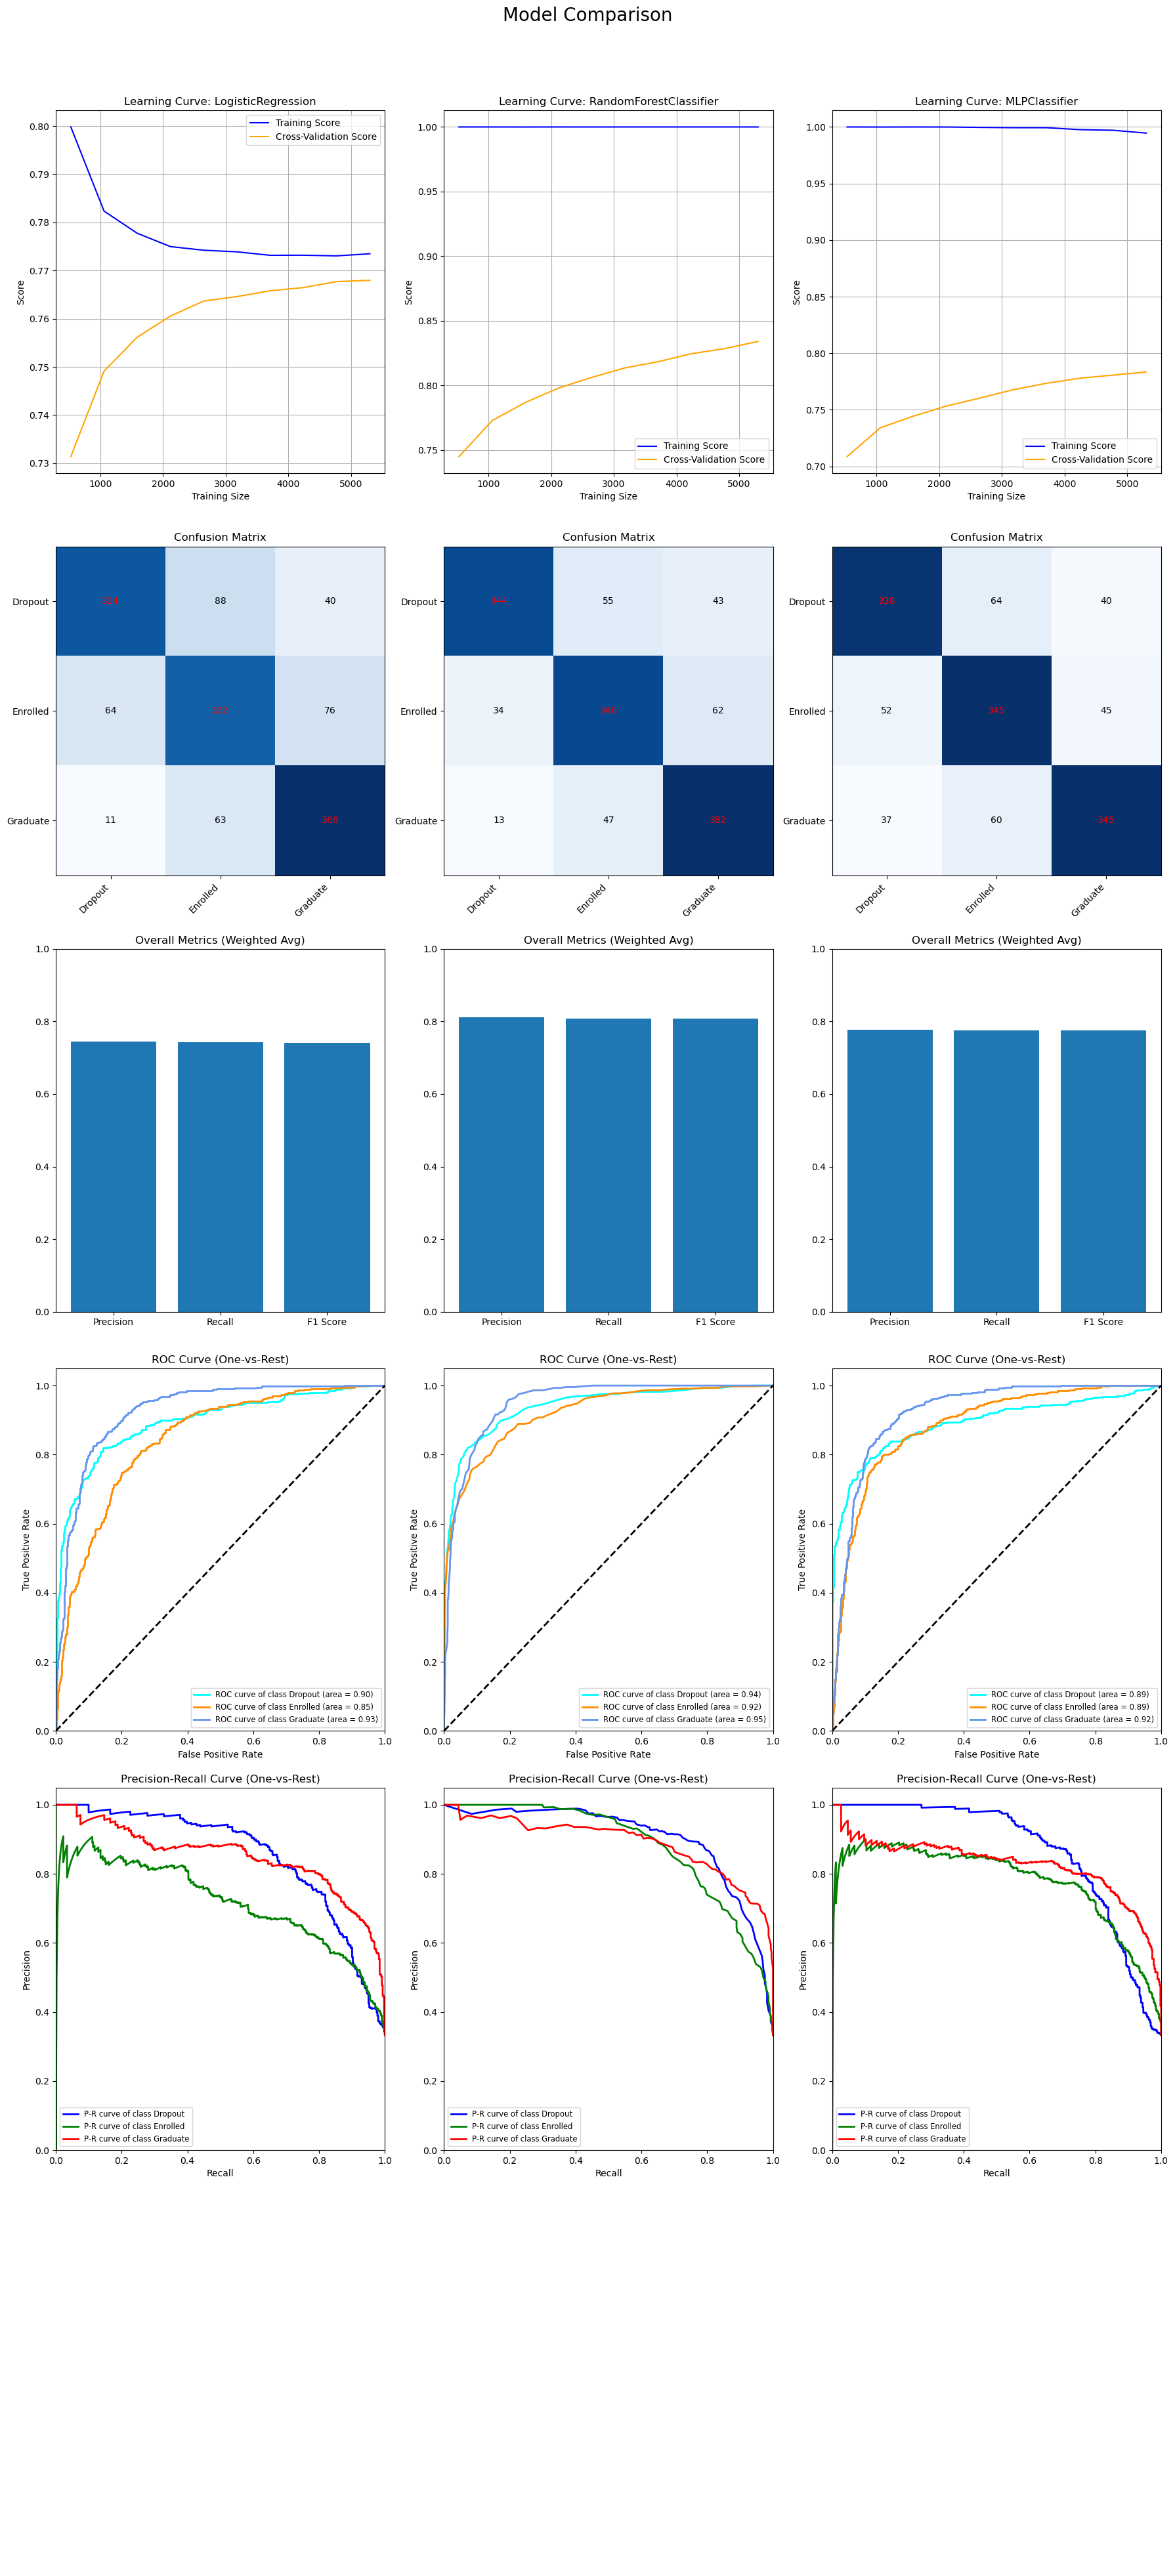

In [70]:

model_compare([
    LogisticRegression(max_iter=5000), 
    RandomForestClassifier(), 
    MLPClassifier(max_iter=5000) # 
], X_resampled, y_resampled)

Tuning RandomForestClassifier...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best RandomForest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
\nTuning MLPClassifier...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best MLPClassifier Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01}
\nRunning model_compare with tuned models...


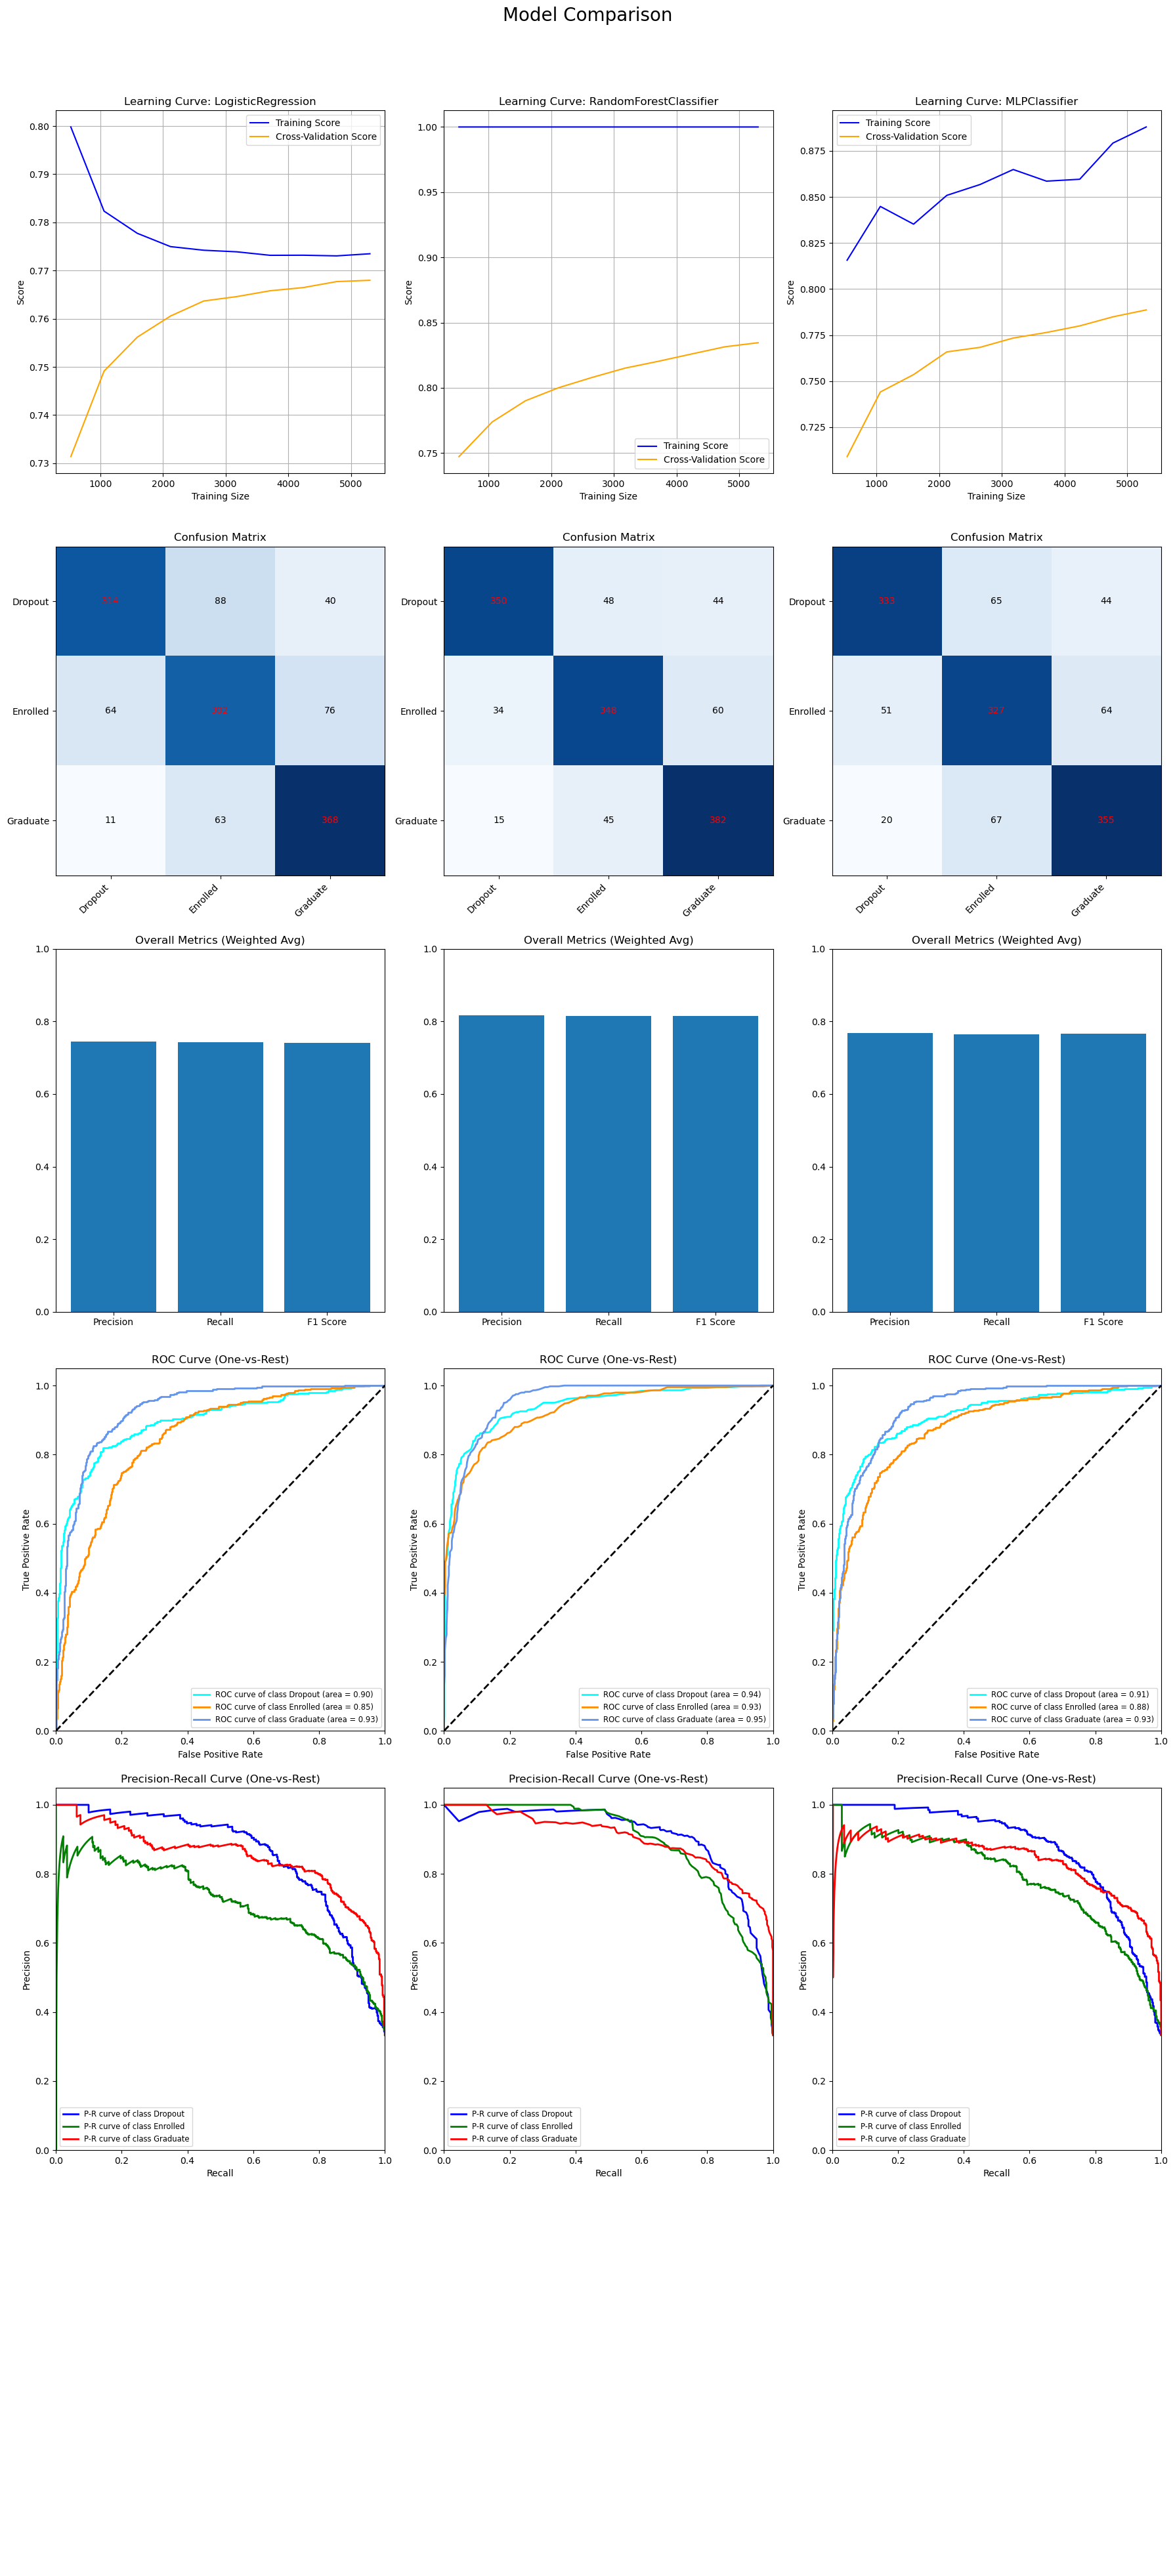

In [71]:
## Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler # Ensure this is available if X_resampled is not already scaled
import pandas as pd # Ensure pandas is imported if you're using X_resampled directly from a DataFrame


log_reg = LogisticRegression(max_iter=5000, solver='lbfgs')

print("Tuning RandomForestClassifier...")
rf_param_grid = {
    'n_estimators': [100, 150],       # Number of trees
    'max_depth': [10, 20, None],      # Max depth of trees
    'min_samples_split': [2, 5],    # Min samples to split a node
    'min_samples_leaf': [1, 2, 4]     # Min samples at a leaf node
}
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
# Using cv=3 for faster tuning in this example; consider cv=5 for more robust results
# Using n_jobs=-1 to use all available processor cores
# Using verbose=1 to see progress

rf_grid_search.fit(X_resampled, y_resampled) # Fit on the resampled data (unscaled, as scaling happens in model_compare)
best_rf = rf_grid_search.best_estimator_
print(f"Best RandomForest Parameters: {rf_grid_search.best_params_}")

# --- MLP Classifier Tuning ---
print("\\nTuning MLPClassifier...")
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,30)], # Neuron configurations
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],          # L2 regularization
    'learning_rate_init': [0.001, 0.01]
}
# Note: MLPClassifier benefits from scaled data for fitting GridSearchCV as well.
# Let's scale X_resampled just for the MLP GridSearchCV part.
if isinstance(X_resampled, pd.DataFrame):
    X_resampled_scaled_for_mlp_tune = StandardScaler().fit_transform(X_resampled.values)
else:
    X_resampled_scaled_for_mlp_tune = StandardScaler().fit_transform(X_resampled)


mlp_grid_search = GridSearchCV(MLPClassifier(max_iter=5000, random_state=42, early_stopping=True, n_iter_no_change=10), # Reduced max_iter for faster tuning, added early stopping
                               mlp_param_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
mlp_grid_search.fit(X_resampled_scaled_for_mlp_tune, y_resampled) # Fit on scaled data for MLP tuning
best_mlp = mlp_grid_search.best_estimator_
print(f"Best MLPClassifier Parameters: {mlp_grid_search.best_params_}")


# --- Run model_compare with the best estimators ---
print("\\nRunning model_compare with tuned models...")
model_compare([log_reg, best_rf, best_mlp], X_resampled, y_resampled)


## Training the models with the best features

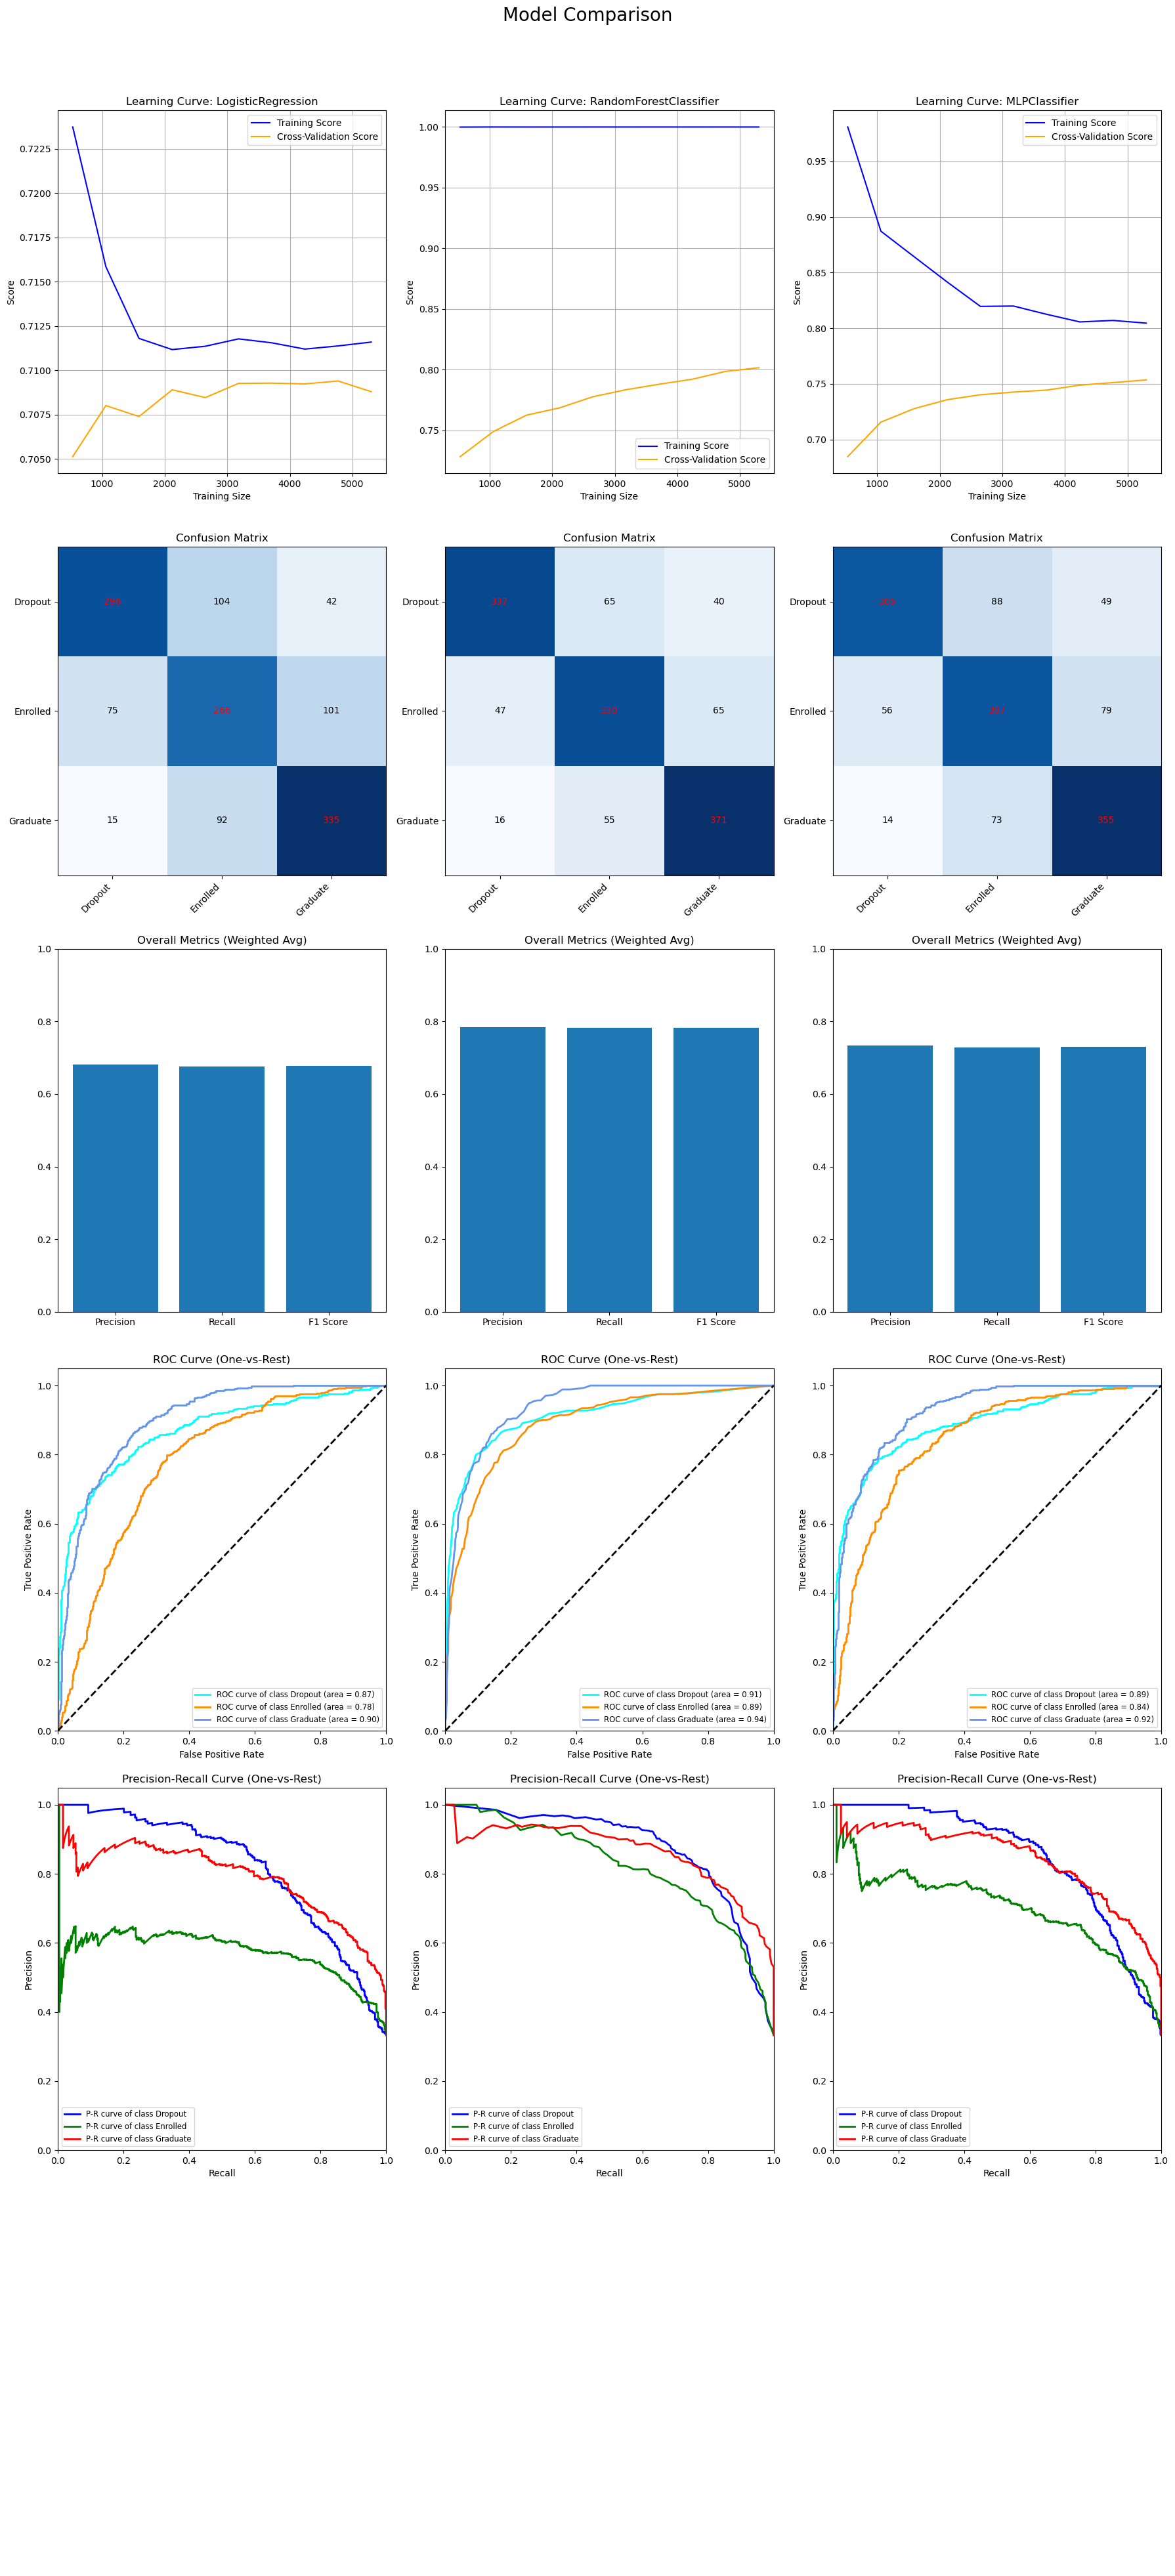

In [72]:

model_compare([
    LogisticRegression(max_iter=5000), 
    RandomForestClassifier(), 
    MLPClassifier(max_iter=5000) # 
], X_resampled[top_10_features], y_resampled)

In [77]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder # Though SMOTE typically handles string labels, explicit encoding can be safer for some operations.

# --- 1. Load the Original Dataset ---
# Assuming 'data.csv' is in the same directory as the notebook
try:
    original_data = pd.read_csv('data.csv', sep=';')
    print("Original data loaded successfully.")
except FileNotFoundError:
    print("Error: 'data.csv' not found. Please ensure the file path is correct.")
    # You might need to stop execution here or handle this error appropriately
    raise

# Clean column names (remove potential leading/trailing spaces or tabs)
original_data.columns = original_data.columns.str.strip()
print("Original column names:", original_data.columns.tolist())


# --- 2. Filter out 'Enrolled' Category ---
# Keep only 'Dropout' and 'Graduate'
data_binary_target = original_data[original_data['Target'].isin(['Dropout', 'Graduate'])].copy() # Use .copy() to avoid SettingWithCopyWarning
print(f"\\nData shape after filtering 'Enrolled': {data_binary_target.shape}")
print("Target value counts after filtering 'Enrolled':")
print(data_binary_target['Target'].value_counts())

if data_binary_target.empty:
    print("\\nError: No data remaining after filtering for 'Dropout' and 'Graduate'. Check your 'Target' column values.")
else:
    # --- 3. Redefine Features (X_binary) and Target (y_binary) ---
    # Assuming the last column is 'Target' and all others are features
    # Re-define the 'features' list based on the cleaned column names
    feature_names_binary = [col for col in data_binary_target.columns if col != 'Target']
    
    X_binary = data_binary_target[feature_names_binary]
    y_binary = data_binary_target['Target']

    print(f"\\nShape of X_binary: {X_binary.shape}")
    print(f"Shape of y_binary: {y_binary.shape}")

    # --- 4. Apply SMOTE to the New Binary Dataset ---
    # SMOTE needs numerical input if there are any non-numeric features that weren't handled before.
    # However, most of your features seem numeric. If you encounter issues,
    # you might need to explicitly encode categorical features in X_binary before SMOTE.
    # For now, let's assume X_binary is ready or SMOTE can handle it.
    
    # Check if y_binary needs encoding (SMOTE usually handles string labels for y, but let's be safe)
    # if y_binary.dtype == 'object':
    #     le = LabelEncoder()
    #     y_binary_encoded = le.fit_transform(y_binary)
    #     print("\\nTarget variable y_binary encoded.")
    # else:
    #     y_binary_encoded = y_binary

    print("\\nApplying SMOTE to the binary target dataset (Dropout vs. Graduate)...")
    smote_binary = SMOTE(random_state=42)
    
    # SMOTE expects all features to be numeric. If you have categorical features
    # not yet encoded, you'll need to handle them (e.g., one-hot encoding) before this step.
    # For this dataset, most features appear numeric, but 'Course' or others might be categorical.
    # If X_binary contains non-numeric columns, SMOTE will raise an error.
    # A robust way is to select only numeric types for SMOTE or preprocess X_binary.
    
    X_numeric_for_smote = X_binary.select_dtypes(include=np.number)
    if X_numeric_for_smote.shape[1] < X_binary.shape[1]:
        print(f"Warning: SMOTE will only be applied to {X_numeric_for_smote.shape[1]} numeric features out of {X_binary.shape[1]}. Non-numeric features are excluded from SMOTE process.")
        # You might want to handle non-numeric features (e.g. one-hot encode) before SMOTE
        # For now, proceeding with numeric features only for SMOTE.
        # The non-numeric columns would need to be added back or handled appropriately post-SMOTE if they are important.
        # This example will proceed with SMOTE on numeric features and then use the original X_binary for model training later,
        # which is not ideal. A better approach is to preprocess X_binary fully (e.g. one-hot encode categoricals)
        # and then apply SMOTE to the fully preprocessed X.
        
        # For simplicity in this step, if you have critical categorical features,
        # ensure they are preprocessed to numeric before this SMOTE application.
        # This example will just use numeric features for SMOTE and then you'd typically
        # use the resampled indices to select from your preprocessed X.
        # However, imblearn's SMOTE can often return a full X if y is correctly indexed.
        
        # Let's try to apply SMOTE to the original X_binary, assuming it can handle it or
        # that your critical features are numeric. If errors occur, preprocessing is needed.
        try:
            X_resampled_binary, y_resampled_binary = smote_binary.fit_resample(X_binary, y_binary)
        except ValueError as e:
            print(f"Error during SMOTE: {e}")
            print("This often means X_binary contains non-numeric data that SMOTE cannot handle directly.")
            print("You may need to preprocess categorical features in X_binary (e.g., using OneHotEncoder) before applying SMOTE.")
            X_resampled_binary, y_resampled_binary = None, None # Set to None to indicate failure
    else:
        X_resampled_binary, y_resampled_binary = smote_binary.fit_resample(X_binary, y_binary)

    if X_resampled_binary is not None:
        # Convert X_resampled_binary back to a DataFrame with original feature names
        X_resampled_binary_df = pd.DataFrame(X_resampled_binary, columns=feature_names_binary)

        print("\\nShape of X_resampled_binary: ", X_resampled_binary_df.shape)
        print("Shape of y_resampled_binary: ", y_resampled_binary.shape)
        print("\\nValue counts in y_resampled_binary (after SMOTE):")
        print(pd.Series(y_resampled_binary).value_counts())

        print("\\n--- Next Steps ---")
        print("You now have 'X_resampled_binary_df' (or 'X_resampled_binary') and 'y_resampled_binary'.")
        print("Use these variables for your subsequent feature analysis, correlation analysis, and model comparison focusing on 'Dropout' vs 'Graduate'.")
    else:
        print("\\nSMOTE could not be completed due to errors. Please preprocess your X_binary data.")


Original data loaded successfully.
Original column names: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployme

/home/andre/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/andre/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/andre/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/andre/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", li

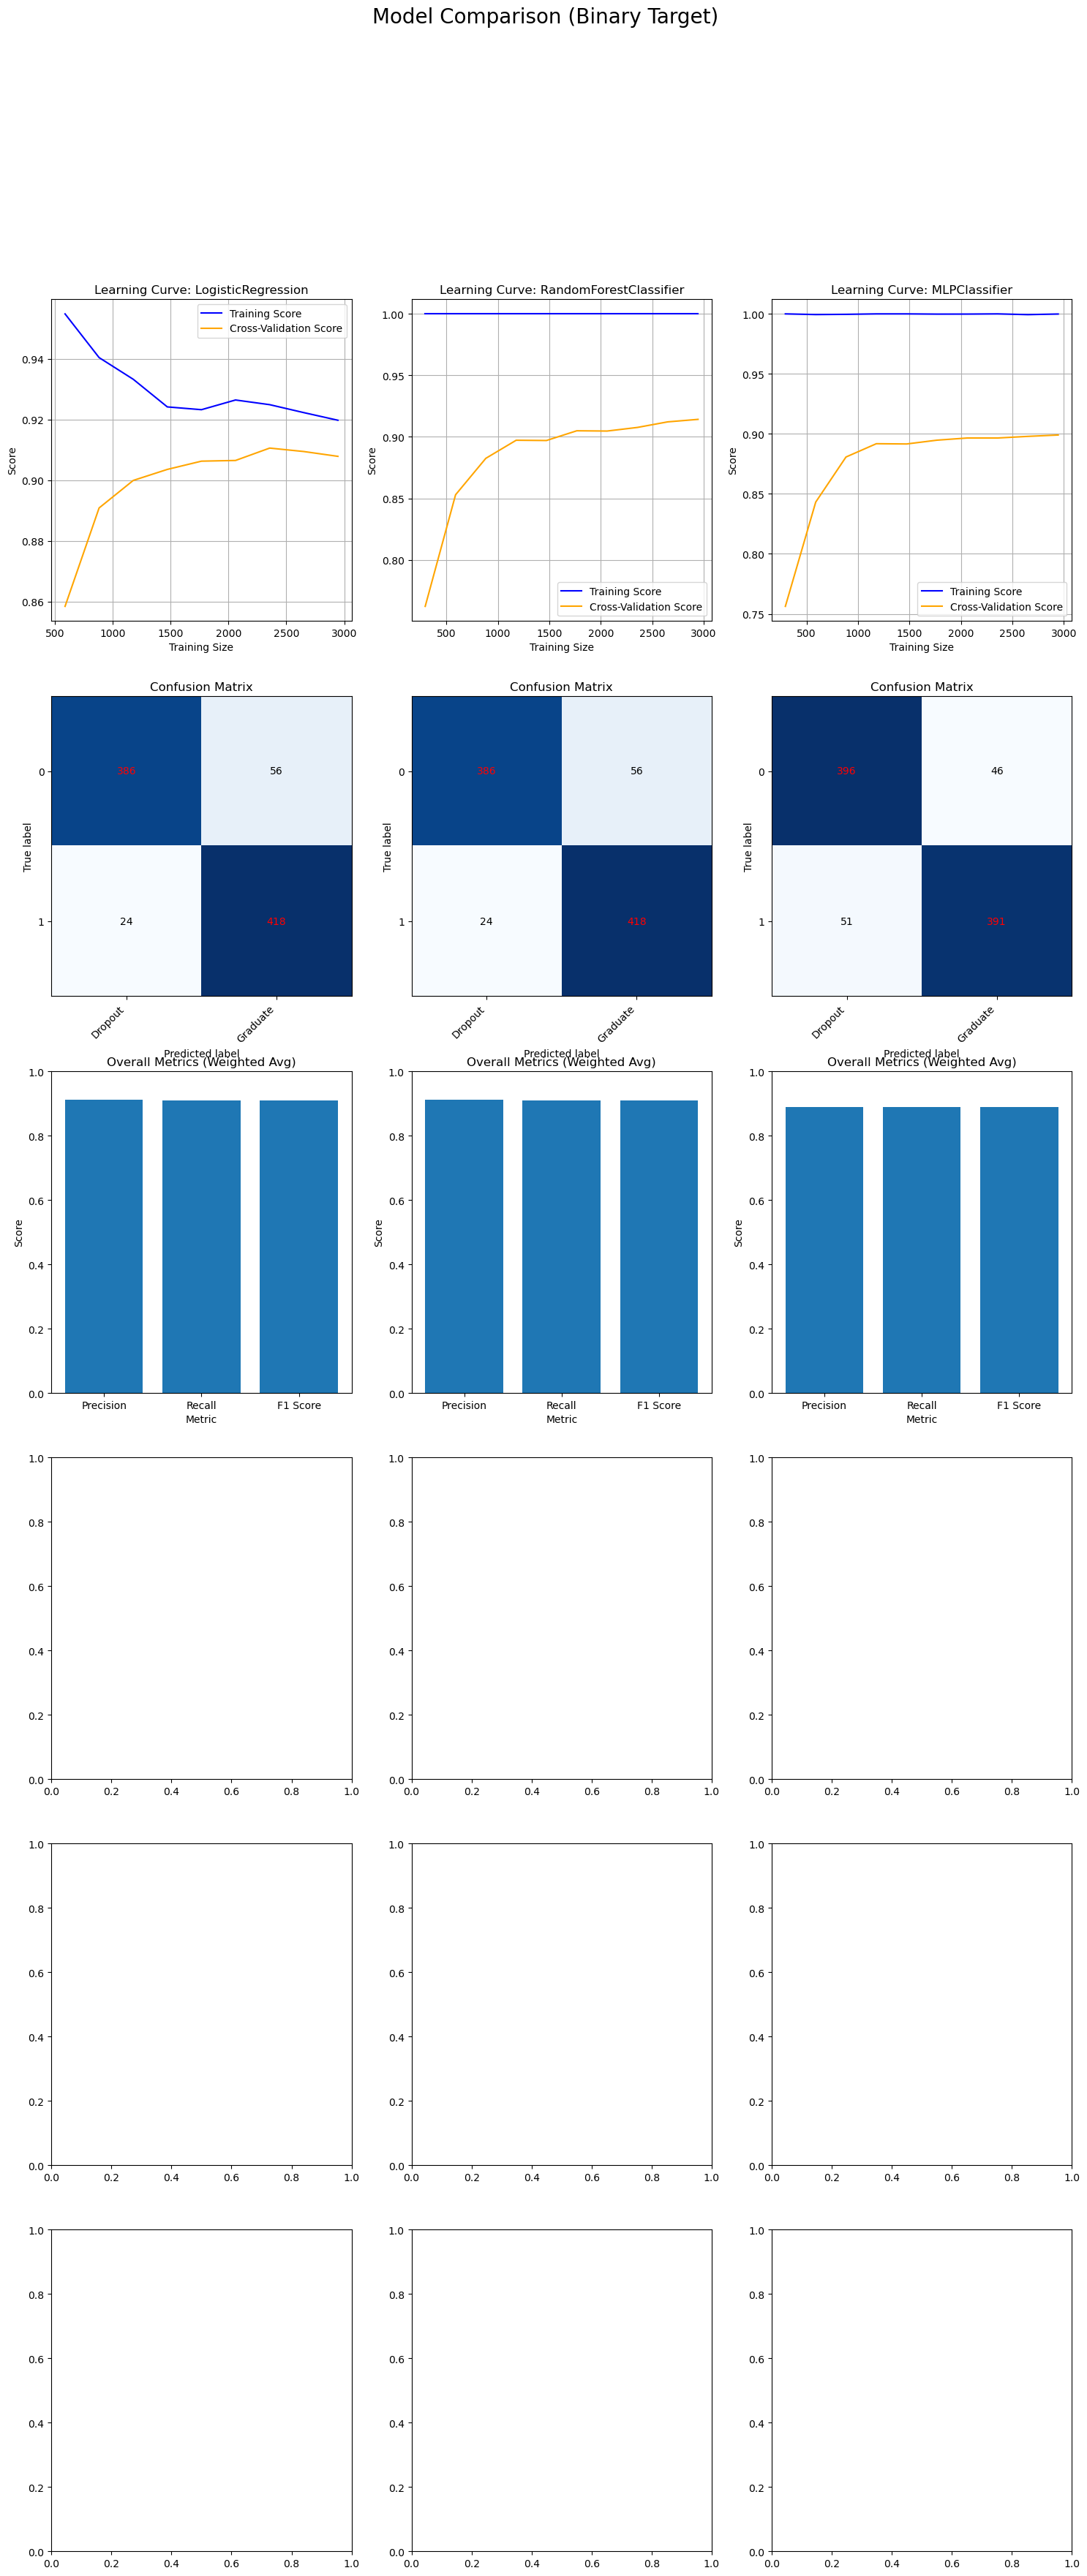

In [84]:
def model_compare_binary(algorithm, X, y):
    figure, charts = plt.subplots(6, len(algorithm), figsize=(6 * len(algorithm), 40))
    figure.suptitle('Model Comparison (Binary Target)', fontsize=20)
    classes = np.unique(y)
    n_classes = len(classes)

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
    y_test_binarized = label_binarize(y_test, classes=classes)

    for i, algo in enumerate(algorithm):
        algo.fit(X_train, y_train)
        y_pred = algo.predict(X_test)
        y_pred_proba = algo.predict_proba(X_test) if hasattr(algo, 'predict_proba') else None

        # Learning Curve
        cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=42)
        train_sizes, train_scores, test_scores = learning_curve(algo, X_scaled, y, cv=3, n_jobs=-1,
                                                                train_sizes=np.linspace(0.1, 1.0, 10))
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        charts[0, i].plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
        charts[0, i].plot(train_sizes, test_scores_mean, label='Cross-Validation Score', color='orange')
        charts[0, i].set_title(f'Learning Curve: {algo.__class__.__name__}')
        charts[0, i].set_xlabel('Training Size')
        charts[0, i].set_ylabel('Score')
        charts[0, i].legend(loc='best')
        charts[0, i].grid()

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        charts[1, i].imshow(cm, cmap='Blues', interpolation='nearest')
        charts[1, i].set_title('Confusion Matrix')
        charts[1, i].set_xticks(np.arange(n_classes))
        charts[1, i].set_yticks(np.arange(n_classes))
        charts[1, i].set_xticklabels(classes, rotation=45, ha="right")
        charts[1, i].set_ylabel('True label')
        charts[1, i].set_xlabel('Predicted label')
        for row in range(n_classes):
            for col in range(n_classes):
                charts[1, i].text(col, row, cm[row, col], ha='center', va='center',
                                  color='red' if cm[row, col] > cm.max() / 2 else 'black')
                
        
        # Bar Chart of Metrics
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        charts[2, i].bar(['Precision', 'Recall', 'F1 Score'], [precision, recall, f1])
        charts[2, i].set_ylim(0, 1)
        charts[2, i].set_title('Overall Metrics (Weighted Avg)')
        charts[2, i].set_ylabel('Score')
        charts[2, i].set_xlabel('Metric')
        


model_compare_binary([
    LogisticRegression(max_iter=5000),
    RandomForestClassifier(), 
    MLPClassifier(max_iter=5000) # 
], X_resampled_binary_df, y_resampled_binary)